In [13]:
pip install -U pymoo
pip install xlsxwriter

  Obtaining dependency information for pymoo from https://files.pythonhosted.org/packages/24/d5/51808c9b220f5449379780e236813df7710fb9be53bf4089f8de0fc0c3f9/pymoo-0.6.1.3-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for autograd>=1.4 from https://files.pythonhosted.org/packages/6d/90/d13cf396989052cadd8511c1878b0913bbce28eeef5feb95710a92e03076/autograd-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cma==3.2.2 from https://files.pythonhosted.org/packages/3d/d9/e607fd2257cc18d64ed4634d3fc437fda81cbd6d728f2d7aa5aad3a95447/cma-3.2.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for alive-progress from https://files.pythonhosted.org/packages/d5/81/91e164705bdf4e2774cea59f566a41ab25f3c87affd716516fc8b03a4039/alive_progress-3.1.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for Deprecated from https://files.py

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D 

In [39]:
class MaterialOptimizationProblem2D(Problem):

    def __init__(self, data, material_properties_dict):
        super().__init__(n_var=1,     # Index of the row in dataset
                         n_obj=2,     # 2 objectives: Stress, CO2
                         n_constr=1,  # 1 constraint: Stress must be below yield stress
                         xl=np.array([0]),
                         xu=np.array([len(data) - 1]))
                         
        self.data = data
        self.material_properties_dict = material_properties_dict
        print("Value of xu:", self.xu)
        
    def _evaluate(self, X, out, *args, **kwargs):
        stress = np.zeros(len(X))
        CO2 = np.zeros(len(X))
        stress_constraint = np.zeros(len(X))
   
        for i, idx in enumerate(X[:, 0].astype(int)):  
            idx = int(np.round(idx))  
            row = self.data.iloc[idx]
            material = row['Material'].strip()
            
            if material in self.material_properties_dict:
                props = self.material_properties_dict[material]
                
                yield_stress = props["Yield_Str [MPa]"]
            
            
            # Objectives
            stress[i] = row['Max VM [MPa]']
            CO2[i] = row['CO2 [t]']
            
            safety_factor = 1.25
            # Constraint: each structure-material combination has its yield stress
            stress_constraint[i] = -stress[i] + (yield_stress/safety_factor)
            # print(f"Structure with row number {row} has a stress value of {stress[i]}, yield stress {yield_stress}, with a material {material} and has a safety margin {stress_constraint[i]}")
            
        out["F"] = np.column_stack([stress, CO2])
        out["G"] = stress_constraint.reshape(-1, 1)


In [41]:
data = pd.read_excel("FinalResults.xlsx", sheet_name="FR")
properties = pd.read_excel("Materials.xlsx")
material_properties_dict = {row['Material']: row for _, row in properties.iterrows()}


problem = MaterialOptimizationProblem2D(data, material_properties_dict)

algorithm = NSGA2(
    pop_size = 100,
    n_offsprings = 200,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob = 0.9, eta = 15),
    mutation = PM(eta = 20),
    eliminate_duplicates a= True
)
res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed = 1,
               verbose=True)


# Population size set at 100 population size of the algorithm, 
# meaning that at any given generation, there will be 100 candidate solutions (individuals)

F = res.F


plt.figure(figsize=(10, 8))
plt.scatter(F[:, 0], F[:, 1], c='blue', s=50, alpha=0.6, label='Pareto Optimal Solutions')
plt.xlabel('Stress [MPa]')
plt.ylabel('CO2 [t]')
plt.title('Pareto Front: Stress vs CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()





SyntaxError: invalid syntax. Perhaps you forgot a comma? (3883866042.py, line 14)

In [ ]:
# Save the results to an Excel file
F = res.F  # Shape: (num_solutions, 2), columns are [Stress, CO2]
results_df = pd.DataFrame(F, columns=['Stress [MPa]', 'CO2 [t]'])

filename = "ParetoFrontResults.xlsx"

try:
    results_df.to_excel(filename, index=False)

    if os.path.exists(filename):
        print(f"Pareto front results successfully saved to {filename}")
    else:
        print("Error: File was not created.")
except Exception as e:
    print(f"An error occurred: {e}")

    
    
    


[[ 400.           90.16733337]
 [9360.           12.27768744]
 [ 400.           90.16733337]
 [9360.           12.27768744]
 [3640.           12.57570443]
 [ 406.           62.00492525]
 [ 804.           25.98765481]
 [ 667.           41.67504793]
 [ 667.           41.67504793]
 [2450.           12.8620616 ]
 [ 655.           53.98702313]
 [3640.           12.57570443]
 [ 635.           54.68987289]
 [ 406.           62.00492525]
 [1050.           21.33212743]
 [1830.           15.13977702]
 [1370.           20.14243095]
 [2450.           12.8620616 ]
 [1600.           16.55061475]
 [ 930.           25.74991314]
 [1830.           15.13977702]
 [1600.           16.55061475]
 [1370.           20.14243095]
 [ 635.           54.68987289]
 [1050.           21.33212743]
 [ 804.           25.98765481]
 [ 930.           25.74991314]
 [ 655.           53.98702313]
 [1830.           15.13977702]
 [1830.           15.13977702]
 [1830.           15.13977702]
 [ 667.           41.67504793]
 [2450. 

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     20 |  0.000000E+00 |  1.8200000000 |             - |             -
     2 |      200 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0038347336 |         ideal
     3 |      300 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0063455986 |             f
     4 |      400 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0002094943 |             f
     5 |      500 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0049555767 |             f
     6 |      600 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0025867591 |             f
     7 |      700 |     48 |  0.000000E+00 |  0.000000E+00 |  5.966304E-06 |             f
     8 |      800 |     60 |  0.000000E+00 |  0.000000E+00 |  0.0013734204 |             f
     9 |      900 |     78 |  0.000000E+00 |  0.000000E+00 |  0.0017121602 |             f
    10 |     1000 |     89 |  0.000000E+00 |  0.000000E+00 |  0.0015005449 |             f

    93 |     9300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
    94 |     9400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
    95 |     9500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
    96 |     9600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
    97 |     9700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005448300 |             f
    98 |     9800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
    99 |     9900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
   100 |    10000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0003632200 |             f
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     17 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      200 |     22 |  0.000000E+00 |  0.000000E+00 |  0.0034698126 |         ideal

    82 |     8200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    83 |     8300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    84 |     8400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    85 |     8500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    86 |     8600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    87 |     8700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    88 |     8800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    89 |     8900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    90 |     9000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    91 |     9100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    92 |     9200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

    77 |     7700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    78 |     7800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    79 |     7900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    80 |     8000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    81 |     8100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    82 |     8200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    83 |     8300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    84 |     8400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    85 |     8500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    86 |     8600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    87 |     8700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

    73 |     7300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    74 |     7400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    75 |     7500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    76 |     7600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    77 |     7700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    78 |     7800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    79 |     7900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    80 |     8000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    81 |     8100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    82 |     8200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    83 |     8300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

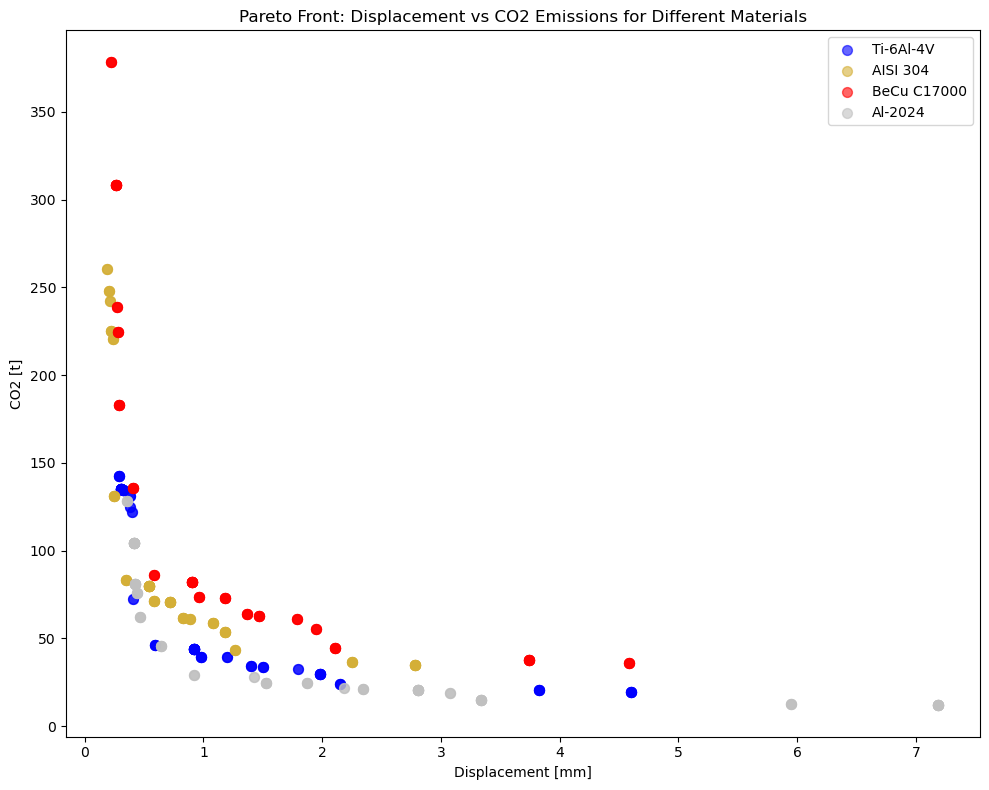

In [ ]:


class MaterialOptimizationProblem2D(Problem):
    def __init__(self, data, material_properties_dict, material):
        super().__init__(n_var=1,     # Index of the row in dataset
                         n_obj=2,     # 2 objectives: Displacement, CO2
                         n_constr=1,  # 1 constraint: Stress must be below yield stress
                         xl=np.array([0]),
                         xu=np.array([len(data) - 1]))
                         
        self.data = data
        self.material_properties_dict = material_properties_dict
        self.material = material

        
    def _evaluate(self, X, out, *args, **kwargs):
        displacement = np.zeros(len(X))
        CO2 = np.zeros(len(X))
        stress_constraint = np.zeros(len(X))
   
        for i, idx in enumerate(X[:, 0].astype(int)):  
            idx = int(np.round(idx))  
            row = self.data.iloc[idx]
            material = row['Material'].strip()
            
            if material == self.material and material in self.material_properties_dict:
                props = self.material_properties_dict[material]
                yield_stress = props["Yield_Str [MPa]"]
            
                # Objectives
                displacement[i] = row['Max Disp [mm]']
                CO2[i] = row['CO2 [t]']
                
                safety_factor = 1.25
                # Constraint: each structure-material combination has its yield stress
                stress_constraint[i] = -row['Max VM [MPa]'] + (yield_stress/safety_factor)
                
            else:
                displacement[i] = np.inf
                CO2[i] = np.inf
                stress_constraint[i] = np.inf
            
        out["F"] = np.column_stack([displacement, CO2])
        out["G"] = stress_constraint.reshape(-1, 1)

properties = pd.read_excel("Materials.xlsx")
material_properties_dict = {row['Material']: row for _, row in properties.iterrows()}

materials = ["Ti-6Al-4V", "AISI 304", "BeCu C17000", "Al-2024"]
results = {}

algorithm = NSGA2(
    pop_size = 100,
    n_offsprings = 100,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob = 0.9, eta = 15),
    mutation = PM(eta = 20),
    eliminate_duplicate= True
)

for material in materials:
    data = pd.read_excel("FilteredResults.xlsx", sheet_name=material)
    problem = MaterialOptimizationProblem2D(data, material_properties_dict, material)
    res = minimize(problem,
                   algorithm,
                   ('n_gen', 100),
                   seed=1,
                   verbose=True)
    results[material] = res.F

plt.figure(figsize=(10, 8))
colors = {"AISI 304": "#D4AF37", "BeCu C17000": "#FF0000", "Al-2024": "#C0C0C0", "Ti-6Al-4V": "#0000FF"}

for material in materials:
    F = results[material]
    plt.scatter(F[:, 0], F[:, 1], c=colors[material], s=50, alpha=0.6, label=material)

plt.xlabel('Displacement [mm]')
plt.ylabel('CO2 [t]')
plt.title('Pareto Front: Displacement vs CO2 Emissions for Different Materials')
plt.legend()
plt.tight_layout()
plt.savefig("pareto_front_all_materials.png", dpi=300)
plt.show()

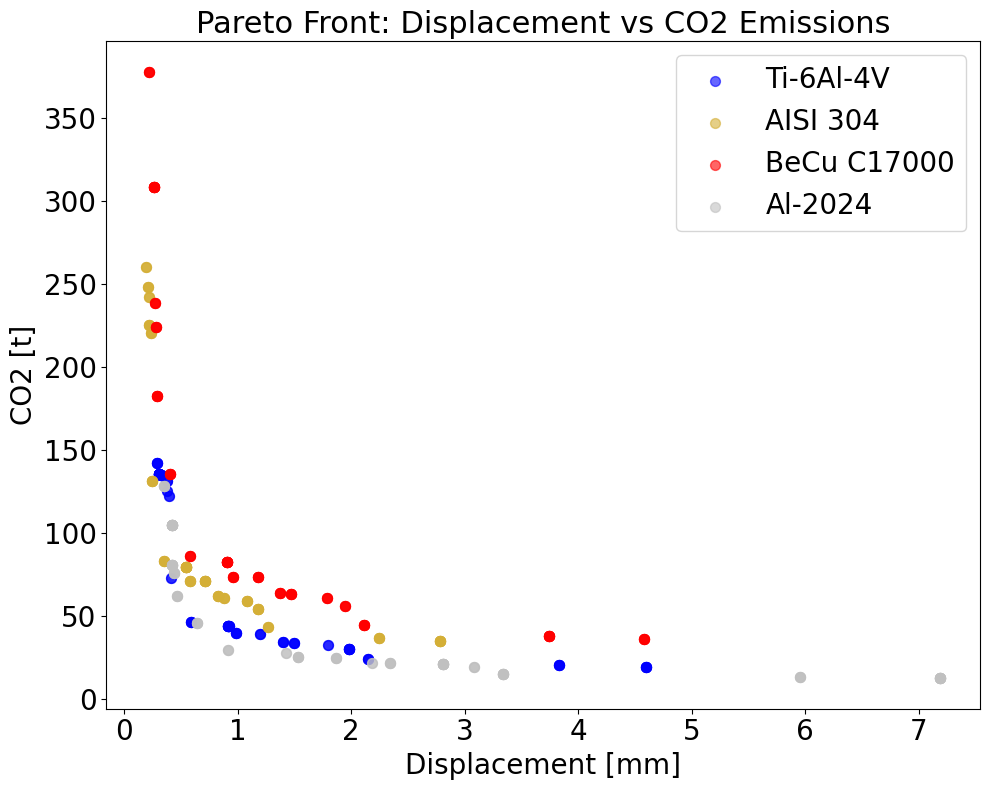

In [ ]:

plt.figure(figsize=(10, 8))
colors = {"AISI 304": "#D4AF37", "BeCu C17000": "#FF0000", "Al-2024": "#C0C0C0", "Ti-6Al-4V": "#0000FF"}

for material in materials:
    F = results[material]
    plt.scatter(F[:, 0], F[:, 1], c=colors[material], s=50, alpha=0.6, label=material)

plt.xlabel('Displacement [mm]', fontsize=20)
plt.ylabel('CO2 [t]', fontsize=20)
plt.title('Pareto Front: Displacement vs CO2 Emissions', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("PF_DispCo2.png", dpi=300)
plt.show()

In [28]:

class MaterialOptimizationProblem3D(Problem):
    def __init__(self, data, yield_stress):
        super().__init__(n_var=1,  # Index of the row in dataset
                         n_obj=3,  # Objectives: Stress, CO2, Displacement
                         n_constr=1,  # Constraint: Stress must be below yield stress
                         xl=np.array([0]),
                         xu=np.array([len(data) - 1]))
        self.data = data
        self.yield_stress = yield_stress
        
    def _evaluate(self, X, out, *args, **kwargs):
        stress = np.zeros(len(X))
        CO2 = np.zeros(len(X))
        displacement = np.zeros(len(X))
        stress_constraint = np.zeros(len(X))
        
        safety_factor = 1.25
        
        for i, idx in enumerate(X[:, 0].astype(int)):
            row = self.data.iloc[idx]
            
            stress[i] = row['Max VM [MPa]']
            CO2[i] = row['CO2 [t]']
            displacement[i] = row['Max Disp [mm]']
            
            # Constraint: stress must be below yield stress / safety factor
            stress_constraint[i] = -stress[i] + (self.yield_stress / safety_factor)
            
        out["F"] = np.column_stack([stress, CO2, displacement])
        out["G"] = stress_constraint.reshape(-1, 1)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     20 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      300 |     49 |  0.000000E+00 |  0.000000E+00 |  0.0359327217 |         ideal
     3 |      500 |     63 |  0.000000E+00 |  0.000000E+00 |  0.0173220974 |         ideal
     4 |      700 |     75 |  0.000000E+00 |  0.000000E+00 |  0.0033614450 |         ideal
     5 |      900 |     92 |  0.000000E+00 |  0.000000E+00 |  0.0049971092 |         ideal
     6 |     1100 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0277651343 |         ideal
     7 |     1300 |     99 |  0.000000E+00 |  0.000000E+00 |  0.0006712304 |             f
     8 |     1500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0038809021 |             f
     9 |     1700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0020059880 |             f
    10 |     1900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0054153122 |             f

    89 |    17700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0008335020 |             f
    90 |    17900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0006671791 |             f
    91 |    18100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0006671791 |             f
    92 |    18300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007623337 |             f
    93 |    18500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011143231 |             f
    94 |    18700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0010838971 |             f
    95 |    18900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0012854282 |             f
    96 |    19100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014686257 |             f
    97 |    19300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0016218122 |             f
    98 |    19500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0012806577 |             f
    99 |    19700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0028650310 |             f

   182 |    36300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0012855001 |             f
   183 |    36500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013346686 |             f
   184 |    36700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013971077 |             f
   185 |    36900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0017384394 |             f
   186 |    37100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0017384394 |             f
   187 |    37300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0020822460 |             f
   188 |    37500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015584757 |             f
   189 |    37700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0012569644 |             f
   190 |    37900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011170062 |             f
   191 |    38100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014099853 |             f
   192 |    38300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014099853 |             f

   276 |    55100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0010425378 |             f
   277 |    55300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015005091 |             f
   278 |    55500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013730969 |             f
   279 |    55700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015819799 |             f
   280 |    55900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015819799 |             f
   281 |    56100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0016445186 |             f
   282 |    56300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0016445186 |             f
   283 |    56500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013960261 |             f
   284 |    56700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015010682 |             f
   285 |    56900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015010682 |             f
   286 |    57100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015003153 |             f

   371 |    74100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011544200 |             f
   372 |    74300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015285114 |             f
   373 |    74500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0017101181 |             f
   374 |    74700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015203638 |             f
   375 |    74900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013773203 |             f
   376 |    75100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015854247 |             f
   377 |    75300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0016316664 |             f
   378 |    75500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0016510083 |             f
   379 |    75700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014612540 |             f
   380 |    75900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015161641 |             f
   381 |    76100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015177810 |             f

   465 |    92900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0009636444 |             f
   466 |    93100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013542078 |             f
   467 |    93300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013542078 |             f
   468 |    93500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014660900 |             f
   469 |    93700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0012779526 |             f
   470 |    93900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013829947 |             f
   471 |    94100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014630147 |             f
   472 |    94300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0014995747 |             f
   473 |    94500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0013483764 |             f
   474 |    94700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0018772788 |             f
   475 |    94900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0020106315 |             f

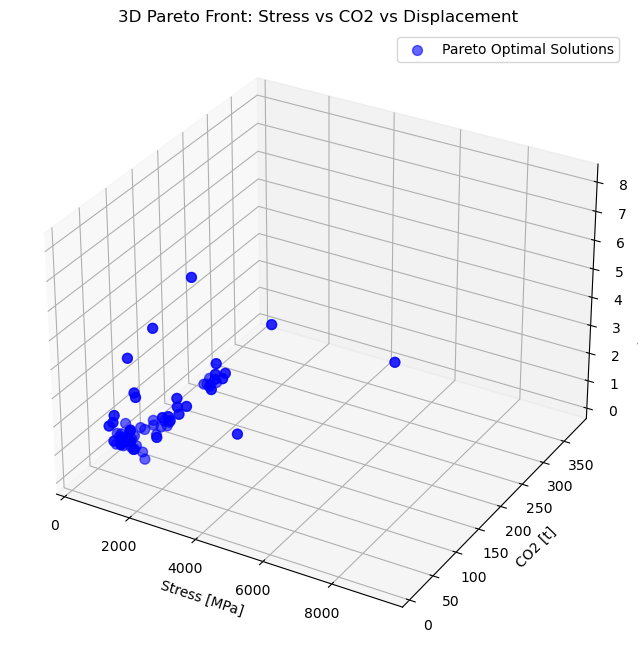

In [ ]:

data = pd.read_excel("FinalResults.xlsx", sheet_name="FR")
properties = pd.read_excel("Materials.xlsx")
material_properties_dict = {row['Material']: row for _, row in properties.iterrows()}

problem = MaterialOptimizationProblem3D(data, material_properties_dict)

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=200,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=True)

F = res.F




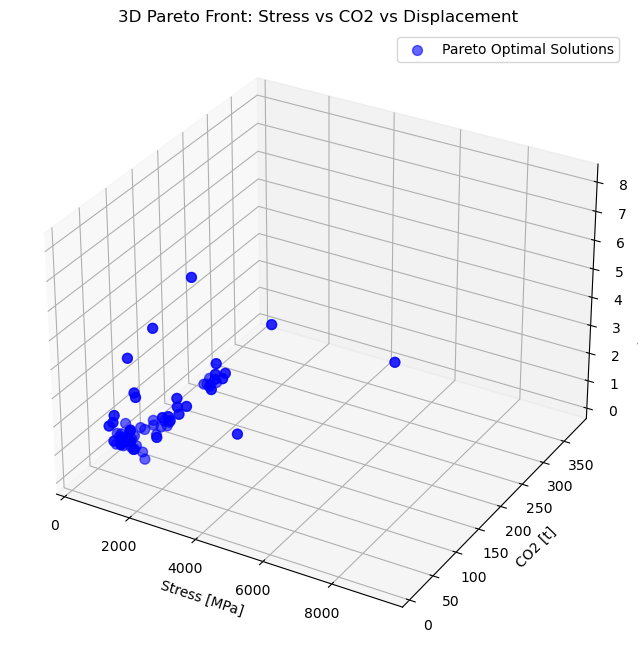

In [6]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(F[:, 0], F[:, 1], F[:, 2], c='blue', s=50, alpha=0.6, label='Pareto Optimal Solutions')

ax.set_xlabel('Stress [MPa]')
ax.set_ylabel('CO2 [t]')
ax.set_zlabel('Displacement [mm]')
ax.set_title('3D Pareto Front: Stress vs CO2 vs Displacement')
ax.legend()

plt.savefig("pareto_front.png", dpi=300, bbox_inches='tight')

plt.show()



In [9]:


file_path = "FinalResults.xlsx"
df = pd.read_excel(file_path, sheet_name="FR") 

materials = ["AISI 304", "BeCu C17000", "Al-2024", "Ti-6Al-4V"]


material_dfs = {material: df[df["Material"] == material].copy() for material in materials}


with pd.ExcelWriter("FilteredResults.xlsx", engine="xlsxwriter") as writer:
    for material, data in material_dfs.items():
        if not data.empty:
            data.to_excel(writer, sheet_name=material.replace(" ", "-"), index=False)

print("New Excel file 'FilteredResults.xlsx' created successfully with separate sheets for each material.")


New Excel file 'FilteredResults.xlsx' created successfully with separate sheets for each material.


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     29 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      200 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0808419768 |         ideal
     3 |      300 |     59 |  0.000000E+00 |  0.000000E+00 |  0.3280032800 |         nadir
     4 |      400 |     69 |  0.000000E+00 |  0.000000E+00 |  0.0038264796 |         ideal
     5 |      500 |     81 |  0.000000E+00 |  0.000000E+00 |  0.0019824303 |             f
     6 |      600 |     99 |  0.000000E+00 |  0.000000E+00 |  0.0024404724 |             f
     7 |      700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0034390063 |             f
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0004988098 |             f
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0020006796 |             f
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0038622625 |             f

    92 |     9200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    93 |     9300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    94 |     9400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    95 |     9500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    96 |     9600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    97 |     9700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    98 |     9800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    99 |     9900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   100 |    10000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   101 |    10100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   102 |    10200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

   187 |    18700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   188 |    18800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   189 |    18900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   190 |    19000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   191 |    19100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   192 |    19200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   193 |    19300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   194 |    19400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   195 |    19500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   196 |    19600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   197 |    19700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

   281 |    28100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   282 |    28200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   283 |    28300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   284 |    28400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   285 |    28500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   286 |    28600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   287 |    28700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   288 |    28800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   289 |    28900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   290 |    29000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   291 |    29100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

   376 |    37600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   377 |    37700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   378 |    37800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   379 |    37900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   380 |    38000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   381 |    38100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   382 |    38200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   383 |    38300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   384 |    38400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   385 |    38500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   386 |    38600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

   471 |    47100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   472 |    47200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   473 |    47300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   474 |    47400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   475 |    47500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   476 |    47600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   477 |    47700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   478 |    47800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   479 |    47900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   480 |    48000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   481 |    48100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

    61 |     6100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    62 |     6200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    63 |     6300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    64 |     6400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    65 |     6500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    66 |     6600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    67 |     6700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    68 |     6800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    69 |     6900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    70 |     7000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
    71 |     7100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f

   154 |    15400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   155 |    15500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   156 |    15600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   157 |    15700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   158 |    15800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   159 |    15900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   160 |    16000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   161 |    16100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   162 |    16200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   163 |    16300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   164 |    16400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f

   245 |    24500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   246 |    24600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   247 |    24700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   248 |    24800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   249 |    24900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   250 |    25000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   251 |    25100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   252 |    25200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   253 |    25300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   254 |    25400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015758668 |             f
   255 |    25500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f

   343 |    34300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   344 |    34400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   345 |    34500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011819001 |             f
   346 |    34600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   347 |    34700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   348 |    34800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   349 |    34900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   350 |    35000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   351 |    35100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   352 |    35200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   353 |    35300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f

   442 |    44200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   443 |    44300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   444 |    44400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   445 |    44500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   446 |    44600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   447 |    44700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   448 |    44800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   449 |    44900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   450 |    45000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   451 |    45100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f
   452 |    45200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0007879334 |             f

    32 |     3200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    33 |     3300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    34 |     3400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    35 |     3500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    36 |     3600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    37 |     3700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    38 |     3800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    39 |     3900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0005497716 |             f
    40 |     4000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0008413693 |             f
    41 |     4100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0008413693 |             f
    42 |     4200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0008413693 |             f

   127 |    12700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   128 |    12800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   129 |    12900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   130 |    13000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   131 |    13100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   132 |    13200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   133 |    13300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   134 |    13400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   135 |    13500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   136 |    13600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   137 |    13700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f

   222 |    22200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   223 |    22300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   224 |    22400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   225 |    22500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   226 |    22600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   227 |    22700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   228 |    22800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   229 |    22900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   230 |    23000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   231 |    23100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   232 |    23200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f

   314 |    31400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   315 |    31500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   316 |    31600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   317 |    31700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   318 |    31800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   319 |    31900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   320 |    32000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   321 |    32100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   322 |    32200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   323 |    32300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   324 |    32400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f

   414 |    41400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   415 |    41500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   416 |    41600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   417 |    41700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   418 |    41800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   419 |    41900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   420 |    42000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   421 |    42100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   422 |    42200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   423 |    42300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f
   424 |    42400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0011329669 |             f

     3 |      300 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0090070912 |             f
     4 |      400 |     71 |  0.000000E+00 |  0.000000E+00 |  0.0306703319 |         nadir
     5 |      500 |     92 |  0.000000E+00 |  0.000000E+00 |  0.0089717046 |         ideal
     6 |      600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.3627546072 |         nadir
     7 |      700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0025705630 |         ideal
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0010686556 |             f
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0024981193 |             f
    11 |     1100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0038374117 |             f
    12 |     1200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    13 |     1300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0006267429 |             f

    95 |     9500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
    96 |     9600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
    97 |     9700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
    98 |     9800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
    99 |     9900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   100 |    10000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   101 |    10100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   102 |    10200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   103 |    10300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   104 |    10400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   105 |    10500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f

   190 |    19000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   191 |    19100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   192 |    19200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   193 |    19300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   194 |    19400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   195 |    19500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   196 |    19600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   197 |    19700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   198 |    19800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   199 |    19900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   200 |    20000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f

   284 |    28400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   285 |    28500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   286 |    28600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   287 |    28700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   288 |    28800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   289 |    28900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   290 |    29000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   291 |    29100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   292 |    29200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   293 |    29300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   294 |    29400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f

   377 |    37700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   378 |    37800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   379 |    37900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   380 |    38000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   381 |    38100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   382 |    38200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   383 |    38300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   384 |    38400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   385 |    38500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   386 |    38600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   387 |    38700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f

   475 |    47500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   476 |    47600 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   477 |    47700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   478 |    47800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   479 |    47900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   480 |    48000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   481 |    48100 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   482 |    48200 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   483 |    48300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   484 |    48400 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f
   485 |    48500 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0022592326 |             f

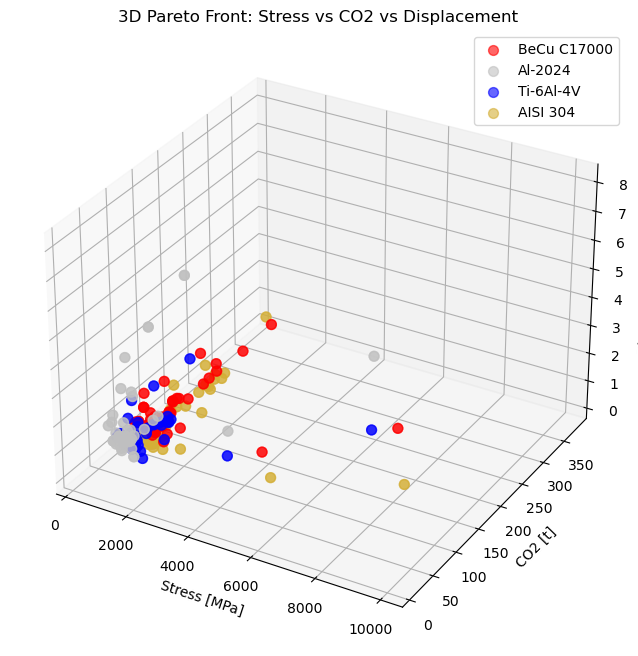

In [ ]:
materials_df = pd.read_excel("Materials.xlsx")
material_yield_strength = {row['Material']: row['Yield_Str [MPa]'] for _, row in materials_df.iterrows()}
materials = ["AISI 304", "BeCu C17000", "Al-2024", "Ti-6Al-4V"]

file_path = "FilteredResults.xlsx"
excel_data = pd.ExcelFile(file_path)


pareto_results = {}
CV= {}

for material in material_yield_strength.keys():
    if material in excel_data.sheet_names:
        data = pd.read_excel(file_path, sheet_name=material)
        yield_stress = material_yield_strength[material]

        problem = MaterialOptimizationProblem3D(data, yield_stress)
        
        algorithm = NSGA2(
            pop_size=100,
            n_offsprings=100,
            sampling=FloatRandomSampling(),
            crossover=SBX(prob=0.9, eta=15),
            mutation=PM(eta=20),
            eliminate_duplicates=True
        )
        
        res = minimize(problem, algorithm, ('n_gen', 500), seed=1, verbose=True)
        
        pareto_results[material] = res.F
        CV [material] = res.CV
        print(f"Material: {material}, Pareto Front Shape: {res.F.shape}")


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {"AISI 304": "#D4AF37", "BeCu C17000": "#FF0000", "Al-2024": "#C0C0C0", "Ti-6Al-4V": "#0000FF"}

for material, F in pareto_results.items():
    ax.scatter(F[:, 0], F[:, 1], F[:, 2], c=colors[material], label=material, s=50, alpha=0.6)

ax.set_xlabel('Stress [MPa]')
ax.set_ylabel('CO2 [t]')
ax.set_zlabel('Displacement [mm]')
ax.set_title('3D Pareto Front: Stress vs CO2 vs Displacement')
ax.legend()

plt.savefig("pareto_front_all_materials.png", dpi=300)
plt.show()








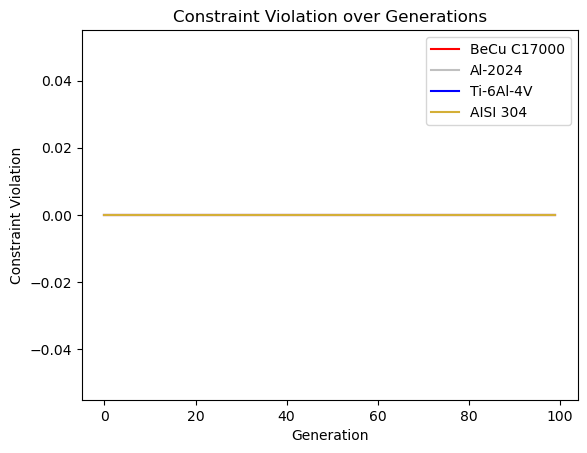

In [40]:
for material, cv in CV.items():
    plt.plot(cv, label=material, color=colors[material])

plt.xlabel('Generation')
plt.ylabel('Constraint Violation')
plt.title('Constraint Violation over Generations')
plt.legend()

plt.savefig("CV.png", dpi=300)
plt.show()



             Mass [kg]  Max VM [MPa]  Max Disp [mm]    CO2 [t]  Energy [MJ]  \
AISI 304     80.586918      3.528829     -24.530180  80.560055   -53.856340   
BeCu C17000  86.455975      2.459314      -1.229081  86.428710   -58.238567   
Al-2024     -36.794578      0.729771      55.035101 -36.799503   -56.135038   

              Water [L]   Cost [$]  
AISI 304     101.670670 -79.892984  
BeCu C17000  183.943109  39.065081  
Al-2024      -19.790074 -92.757712  
             Mass [kg]  Max VM [MPa]  Max Disp [mm]   CO2 [t]  Energy [MJ]  \
AISI 304      0.000353      3.440238      55.680499  0.000353     0.000090   
BeCu C17000   0.000374      2.419094       0.600303  0.000374     0.000084   
Al-2024       0.000091      0.742089       9.217960  0.000091     0.000063   

             Water [L]  Cost [$]  
AISI 304      0.000394  0.000039  
BeCu C17000   0.000569  0.000279  
Al-2024       0.000115  0.000010  


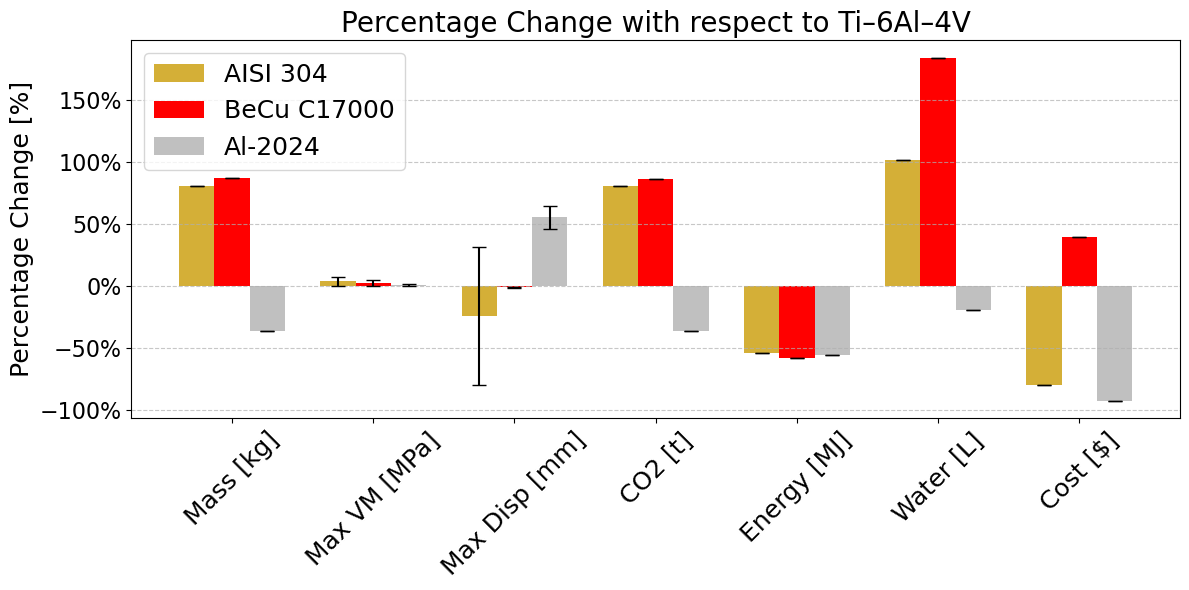

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

file_path = "FinalResults.xlsx"

data = pd.read_excel(file_path)

materials = ["Ti-6Al-4V", "AISI 304", "BeCu C17000", "Al-2024"]
required_columns = ["Material", "Mass [kg]", "Max VM [MPa]", "SF", "Max Disp [mm]", "CO2 [t]", "Energy [MJ]"]

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

for column in required_columns:
    if column not in ["Material", "SF"]:
        data[column] = pd.to_numeric(data[column], errors='coerce')

data_by_material = {material: data[data["Material"] == material].set_index("Name") for material in materials}

percentage_changes = {material: {} for material in materials if material != "Ti-6Al-4V"}

for name, titanium_values in data_by_material["Ti-6Al-4V"].iterrows():
    for material in materials:
        if material != "Ti-6Al-4V" and name in data_by_material[material].index:
            for key in titanium_values.index:
                if key not in ["Material", "SF"]:
                    ti_value = titanium_values[key]
                    other_value = data_by_material[material].at[name, key]
                    if ti_value != 0:
                        change = ((other_value - ti_value) / ti_value) * 100
                    else:
                        change = None
                    
                    if key not in percentage_changes[material]:
                        percentage_changes[material][key] = []
                    
                    if change is not None and not np.isnan(change):
                        percentage_changes[material][key].append(change)

mean_percentage_changes = {}
std_dev_percentage_changes = {}
for material, variables in percentage_changes.items():
    mean_percentage_changes[material] = {
        key: sum(values) / len(values) if values else None 
        for key, values in variables.items() if values
    }
    std_dev_percentage_changes[material] = {
        key: np.std(values) if values else None
        for key, values in variables.items() if values
    }

df_mean_changes = pd.DataFrame(mean_percentage_changes).T
df_std_dev_changes = pd.DataFrame(std_dev_percentage_changes).T

print(df_mean_changes)
print(df_std_dev_changes)

colors = {
    "AISI 304": "#D4AF37",
    "BeCu C17000": "#FF0000",
    "Al-2024": "#C0C0C0"
}

variables = df_mean_changes.columns
materials = df_mean_changes.index
x = np.arange(len(variables))
width = 0.25

values = {material: df_mean_changes.loc[material].values for material in materials}
errors = {material: df_std_dev_changes.loc[material].values for material in materials}

fig, ax = plt.subplots(figsize=(12, 6))

for i, material in enumerate(materials):
    ax.bar(x + i * width, values[material], width, label=material, color=colors.get(material, "gray"), yerr=errors[material], capsize=5)

ax.set_ylabel('Percentage Change [%]', fontsize=18)
ax.set_title('Percentage Change with respect to Ti–6Al–4V', fontsize=20)
ax.set_xticks(x + width)
ax.set_xticklabels(variables, rotation=45, fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=18)

plt.tight_layout()
plt.savefig("barplot.png", dpi=300)
plt.show()